## Predicting if a student is admitted to graduate school or not

In [35]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

import seaborn as sn

In [20]:
# Importing dataset
df = pd.read_stata("https://stats.idre.ucla.edu/stat/stata/dae/binary.dta")

df

,admit,gre,gpa,rank
0,0.0,380.0,3.61,3.0
1,1.0,660.0,3.67,3.0
2,1.0,800.0,4.00,1.0
3,1.0,640.0,3.19,4.0
4,0.0,520.0,2.93,4.0
...,...,...,...,...
395,0.0,620.0,4.00,2.0
396,0.0,560.0,3.04,3.0
397,0.0,460.0,2.63,2.0
398,0.0,700.0,3.65,2.0


In [23]:
df.isnull().sum()

admit    0
gre      0
gpa      0
rank     0
dtype: int64

In [41]:
x_train, x_test, y_train, y_test = train_test_split(df[["gre", "gpa", "rank"]], df["admit"], test_size=0.2)

display(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(320, 3)

(320,)

(80, 3)

(80,)

In [42]:
model = LogisticRegression(solver="lbfgs", max_iter=1000)

In [43]:
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

In [44]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
print("Confusion Matrix:", confusion_matrix)
acc_score = metrics.accuracy_score(y_test, y_pred)
print("Accuracy in percentage: ", acc_score*100, "%")


Confusion Matrix: [[49  5]
 [18  8]]
Accuracy in percentage:  71.25 %


<Axes: xlabel='Predicted', ylabel='Actual'>

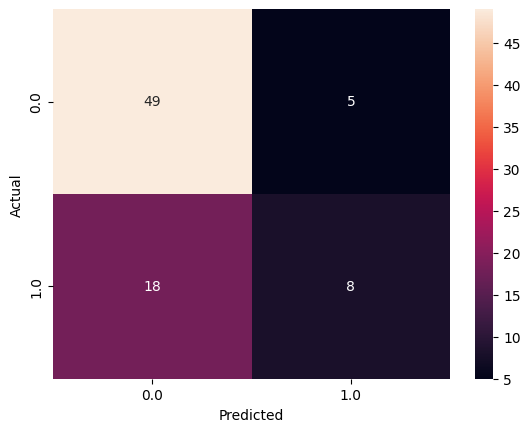

In [45]:
conf_mat = pd.crosstab(y_test, y_pred, rownames=["Actual"], colnames=["Predicted"])
sn.heatmap(conf_mat, annot=True)